In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures

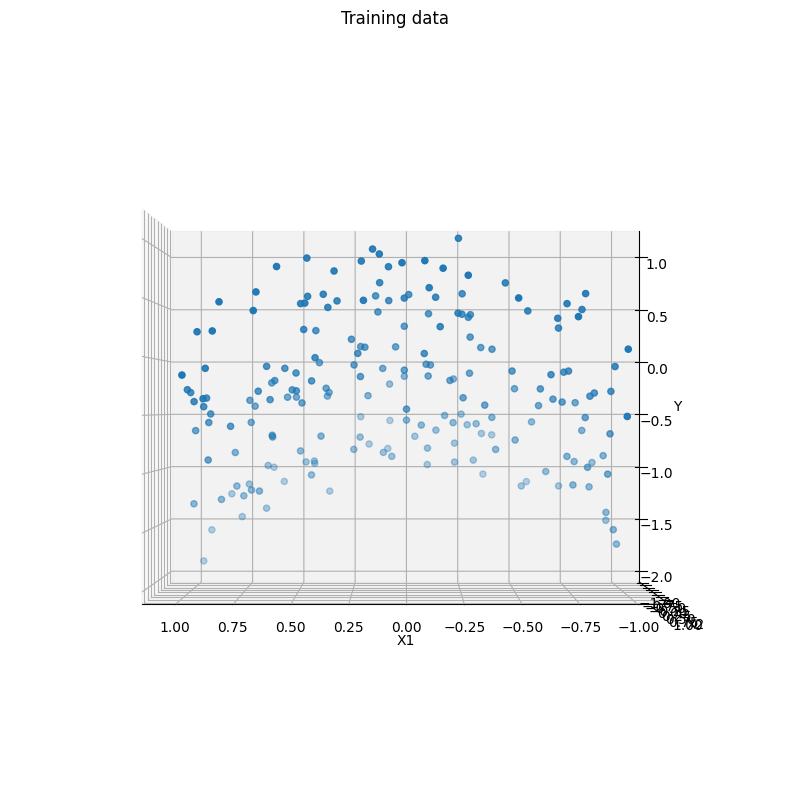

In [14]:
df = pd.read_csv('week3.txt', header=None)
x = df.iloc[:,:2]
y = df.iloc[:,2]

fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111, projection ='3d') 
ax.scatter(x[0], x[1] , y)
ax.view_init(0,90)
ax.set(title='Training data', xlabel='X1', ylabel='X2', zlabel='Y')
plt.show()